# CLASSIFICATION OF DIABETES DATABASE USING ARTIFICIAL NEURAL NETWORKS

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('Diabetes.tsv', sep='\t') #datasetin okunması
dataset.head()

,Preg,GLU,BP,ST,INS,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Preg     768 non-null    int64  
 1   GLU      768 non-null    int64  
 2   BP       768 non-null    int64  
 3   ST       768 non-null    int64  
 4   INS      768 non-null    int64  
 5   BMI      768 non-null    float64
 6   DPF      768 non-null    float64
 7   Age      768 non-null    int64  
 8   Outcome  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.isnull().sum() #boş data kontorlü

Preg       0
GLU        0
BP         0
ST         0
INS        0
BMI        0
DPF        0
Age        0
Outcome    0
dtype: int64

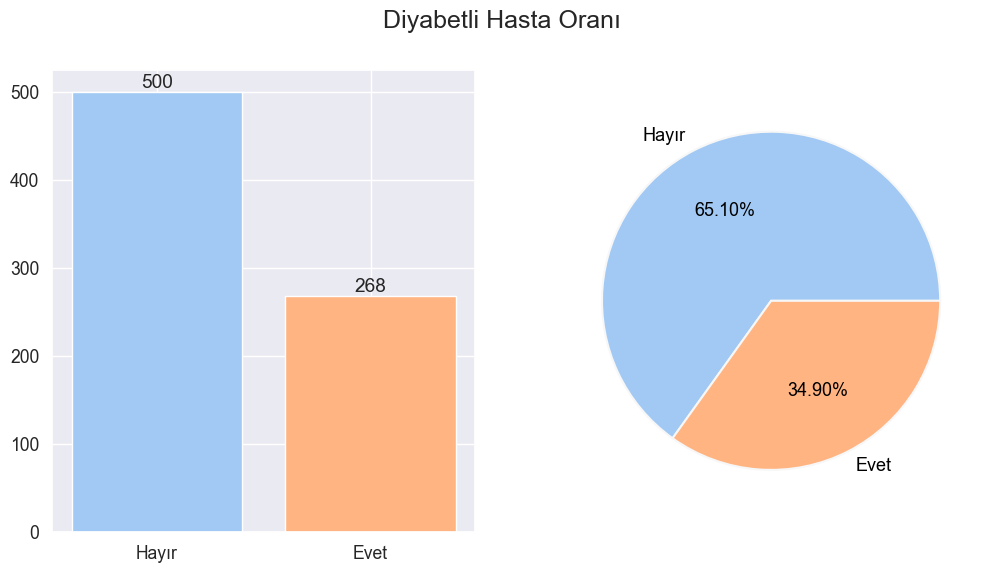

In [70]:
#renk paleti 
pastel_colors = sns.color_palette("pastel")

# Grafik başlığı konumuayarlama 
f, ax = plt.subplots(1, 2, figsize=(12, 6))
f.suptitle("Diyabetli Hasta Oranı", fontsize=18.)

# Çubuk grafiğini çizme ve üzerine değer yazmdırma
outcome_counts = dataset.Outcome.value_counts()
bars = ax[0].bar(outcome_counts.index, outcome_counts.values, color=pastel_colors[:2])

# x eksenindeki konum ve etiket ayarlama
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["Hayır", "Evet"], rotation=0)

# Her çubuk için değeri yazdırma
for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Pasta grafiği çizdirme
_ = outcome_counts.plot.pie(labels=("Hayır", "Evet"), autopct="%.2f%%", label="", fontsize=13., ax=ax[1], colors=pastel_colors[:2], wedgeprops={"linewidth": 1.5, "edgecolor": "#F7F7F7"})

# Pasta grafiğinin labellarının siyah yapılması
for text in ax[1].texts:
    text.set_color("black")

plt.show()


<AxesSubplot: xlabel='DPF', ylabel='Count'>

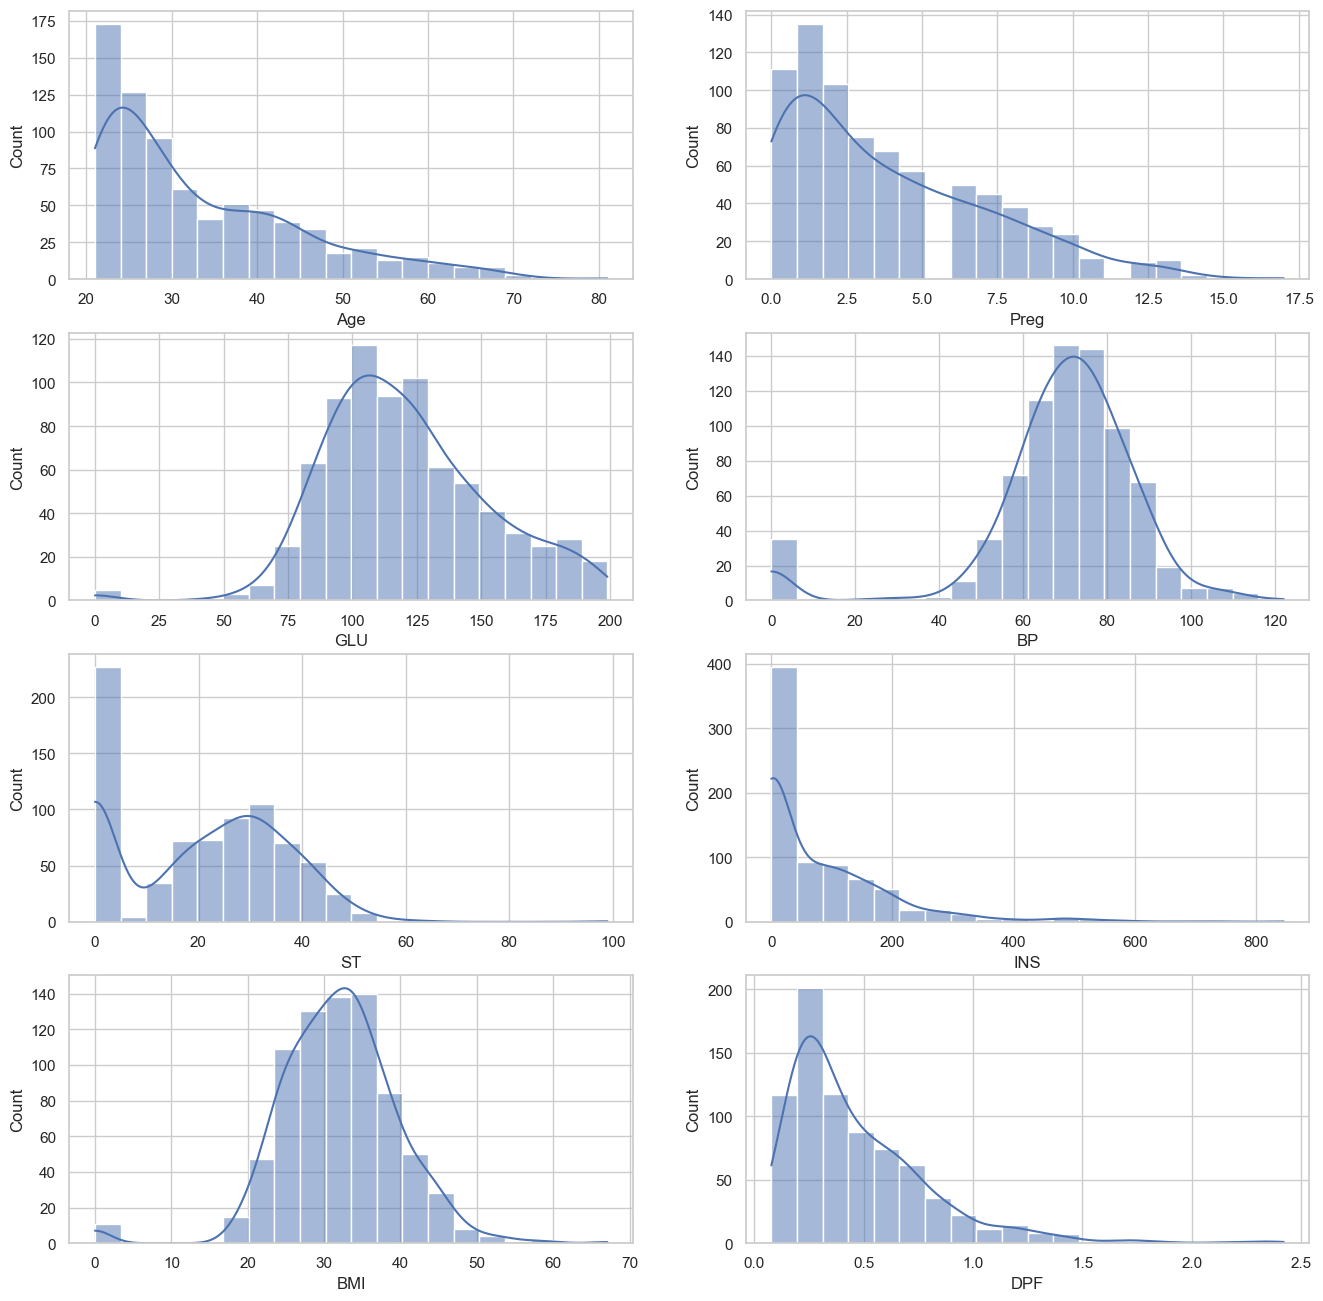

In [87]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(dataset.Age, bins = 20, ax=ax[0,0], kde = True) 
sns.histplot(dataset.Preg, bins = 20, ax=ax[0,1], kde = True) 
sns.histplot(dataset.GLU, bins = 20, ax=ax[1,0], kde = True) 
sns.histplot(dataset.BP, bins = 20, ax=ax[1,1], kde = True) 
sns.histplot(dataset.ST, bins = 20, ax=ax[2,0], kde = True)
sns.histplot(dataset.INS, bins = 20, ax=ax[2,1], kde = True)
sns.histplot(dataset.BMI, bins = 20, ax=ax[3,0], kde = True) 
sns.histplot(dataset.DPF, bins = 20, ax=ax[3,1], kde = True) 

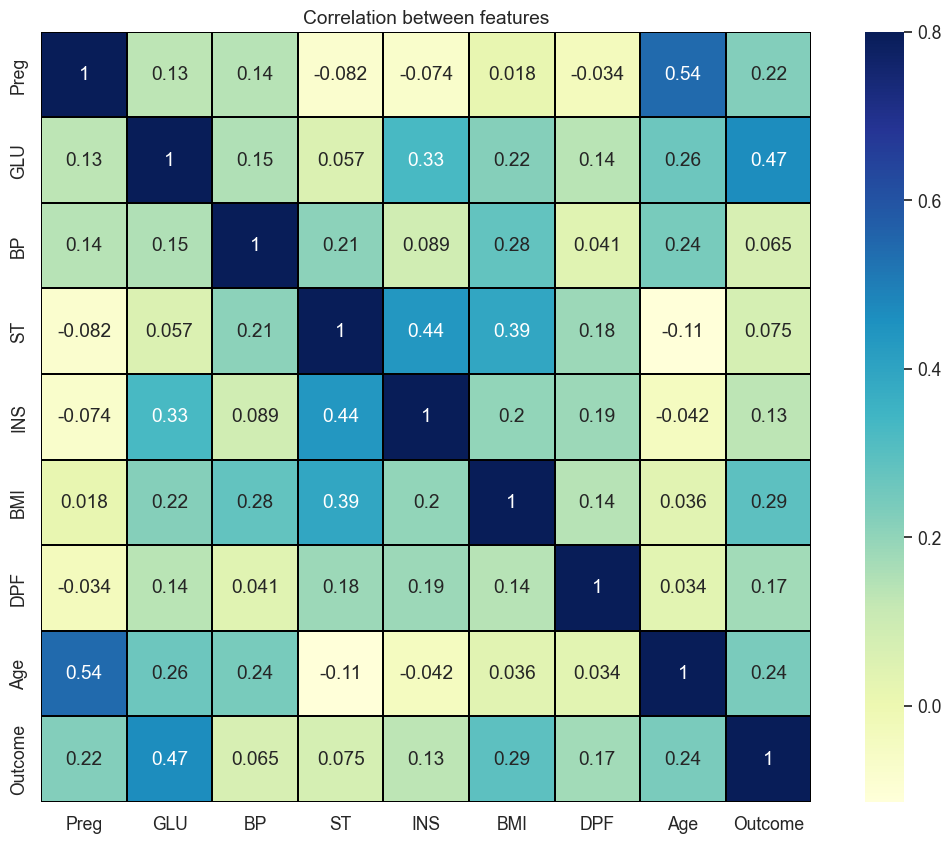

In [9]:
corr=dataset.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

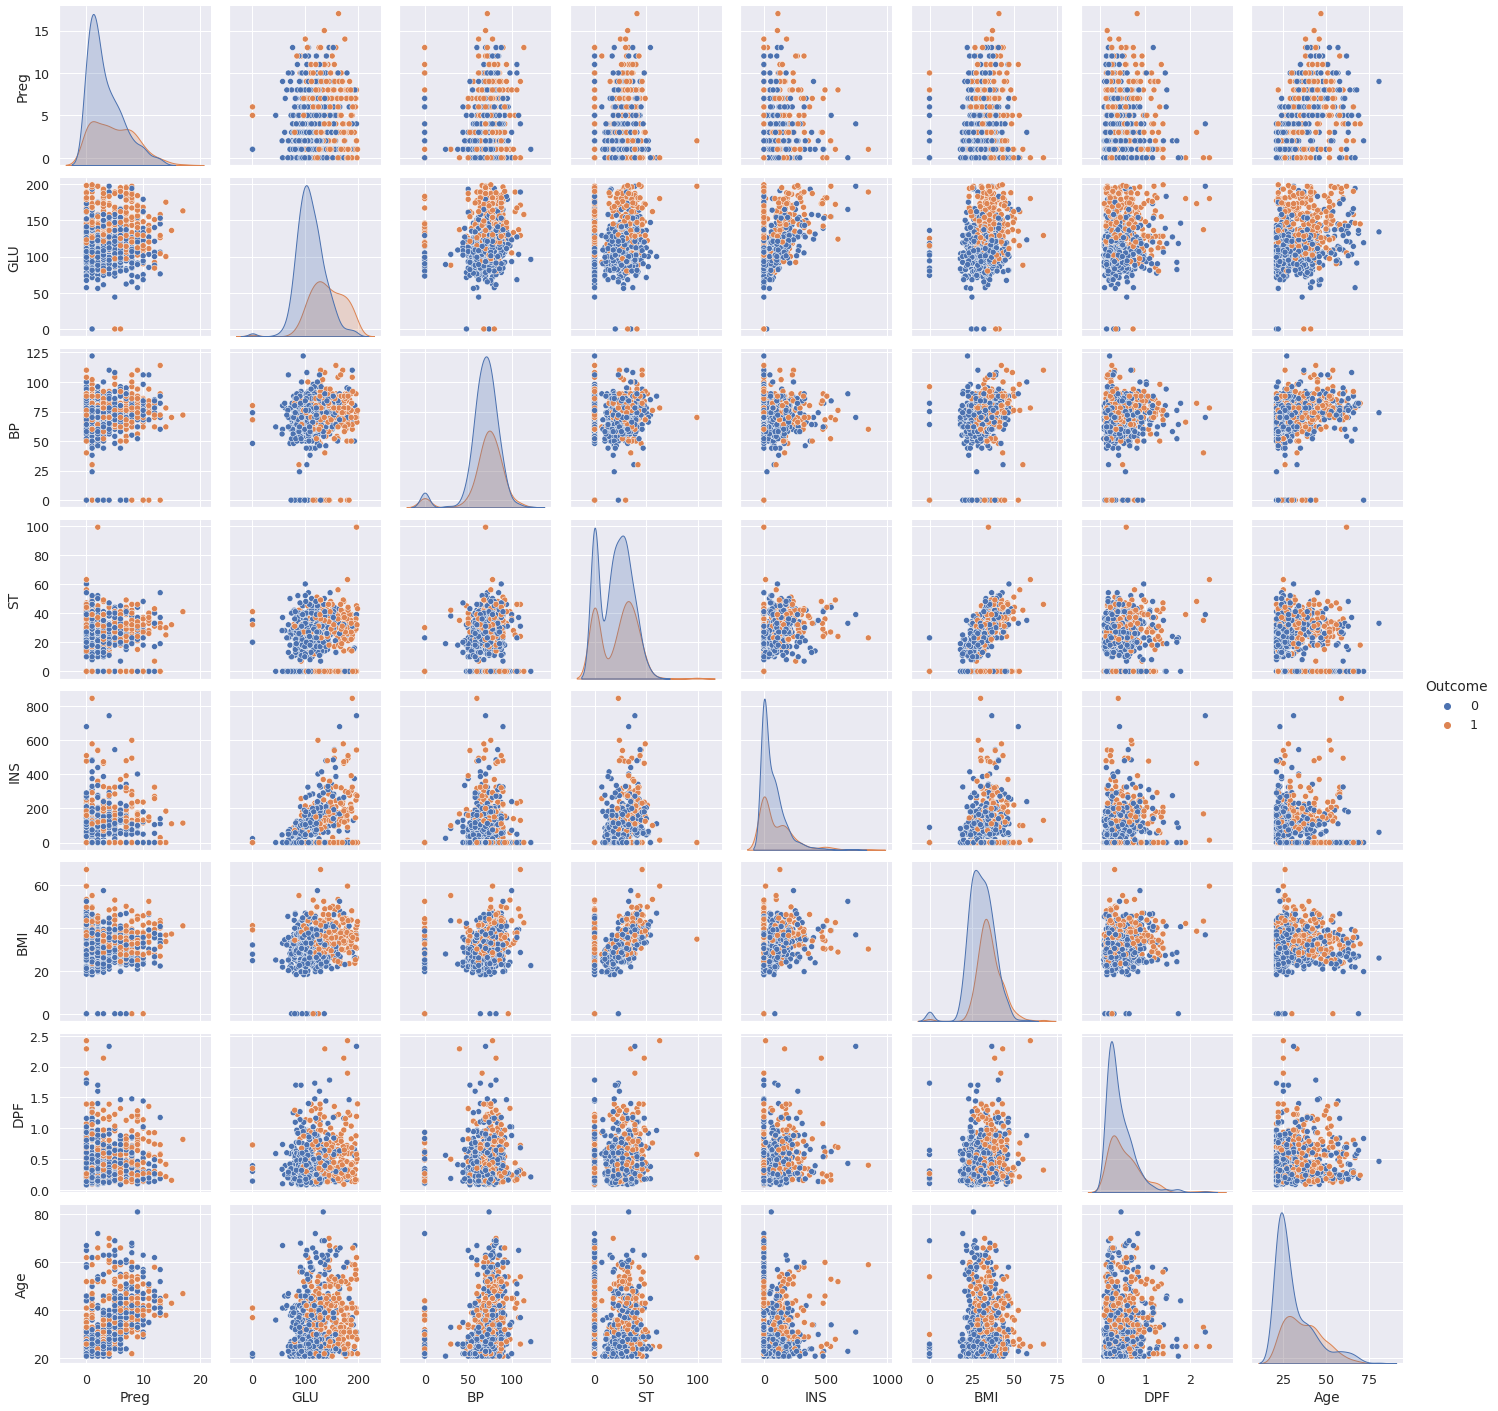

In [34]:
sns.pairplot(data=dataset, hue='Outcome')
plt.show()

In [10]:
x = dataset.iloc[:,0:8].values
y = dataset.iloc[:, -1].values

In [11]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [12]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [13]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# x = sc.fit_transform(x)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [14]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [15]:
x.shape

(768, 8)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=12)

In [17]:
x_test.shape

(154, 8)

In [18]:
y_test.shape

(154,)

In [88]:
model = Sequential()
model.add(Dense(32, input_dim=8, activation='sigmoid'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [89]:
model.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 32)                288       
                                                                 
 dense_111 (Dense)           (None, 16)                528       
                                                                 
 dense_112 (Dense)           (None, 8)                 136       
                                                                 
 dense_113 (Dense)           (None, 1)                 9         
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


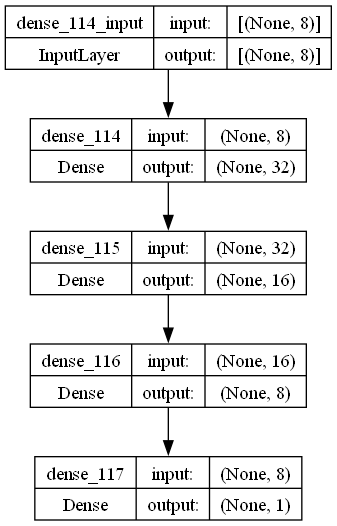

In [110]:
from tensorflow.keras.utils import plot_model

#modelin şemasını çizdirme
plot_model(model, show_shapes=True, show_layer_names=True)


In [91]:
hist = model.fit(x_train,y_train, epochs =100,validation_data=(x_test, y_test))

Epoch 1/100
20/20 [==============================] - 1s 9ms/step - loss: 0.6559 - accuracy: 0.6564 - val_loss: 0.6387 - val_accuracy: 0.6429
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6216 - accuracy: 0.6531 - val_loss: 0.6234 - val_accuracy: 0.6429
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6103 - accuracy: 0.6531 - val_loss: 0.6114 - val_accuracy: 0.6364
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5943 - accuracy: 0.6564 - val_loss: 0.5951 - val_accuracy: 0.6429
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5763 - accuracy: 0.6840 - val_loss: 0.5701 - val_accuracy: 0.6818
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5511 - accuracy: 0.7052 - val_loss: 0.5455 - val_accuracy: 0.7273
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5286 - accuracy: 0.7410 - val_loss: 0.5247 - val_accuracy: 0.7662
Epoch 8/100
2

In [113]:
# Train and Test accuracy
scores = model.evaluate(x_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(x_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

20/20 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.7883
Training Accuracy: 78.83%

5/5 [==============================] - 0s 5ms/step - loss: 0.4834 - accuracy: 0.8247
Testing Accuracy: 82.47%



In [114]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

5/5 [==============================] - 0s 4ms/step
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[90  9]
 [18 37]]


0.8246753246753247

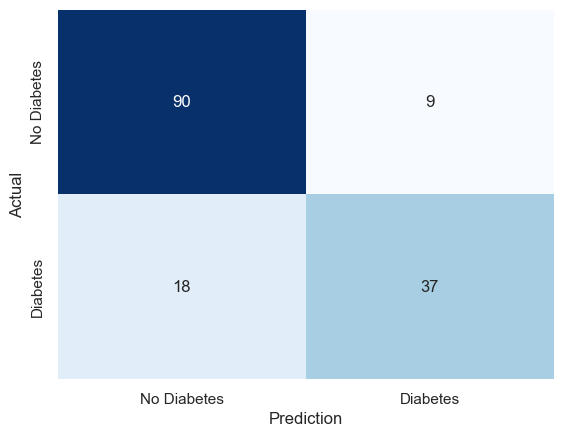

In [116]:
ax = sns.heatmap(cm, annot=True, xticklabels=["No Diabetes",'Diabetes'], yticklabels=['No Diabetes','Diabetes'],
                cbar=False,cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

In [117]:
acc = hist.history['accuracy']
loss = hist.history['loss'] 

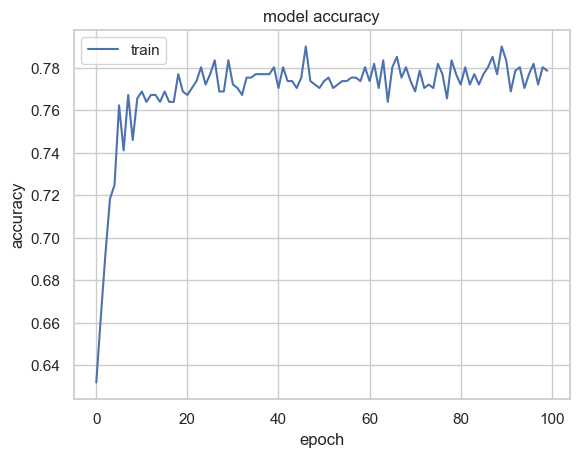

<Figure size 640x480 with 0 Axes>

In [120]:
from matplotlib import pyplot as plt
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

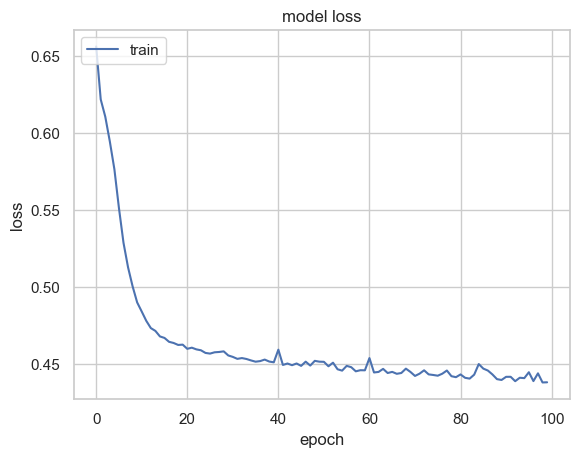

<Figure size 640x480 with 0 Axes>

In [97]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')


Epoch 1/100
20/20 [==============================] - 1s 9ms/step - loss: 0.6945 - accuracy: 0.4967 - val_loss: 0.6856 - val_accuracy: 0.6429
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.6531 - val_loss: 0.6556 - val_accuracy: 0.6429
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6452 - accuracy: 0.6531 - val_loss: 0.6396 - val_accuracy: 0.6429
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6306 - accuracy: 0.6531 - val_loss: 0.6261 - val_accuracy: 0.6429
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6162 - accuracy: 0.6531 - val_loss: 0.6096 - val_accuracy: 0.6429
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5993 - accuracy: 0.6564 - val_loss: 0.5889 - val_accuracy: 0.6494
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5790 - accuracy: 0.6775 - val_loss: 0.5692 - val_accuracy: 0.7078
Epoch 8/100
2

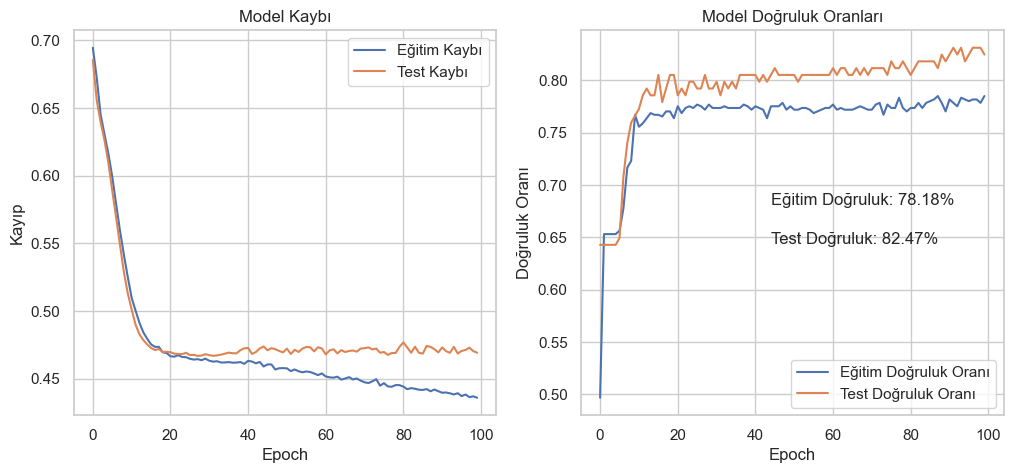

In [122]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('Diabetes.tsv', sep='\t') #datasetin okunması

x = dataset.iloc[:,0:8].values
y = dataset.iloc[:, -1].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=12)


model = Sequential()
model.add(Dense(32, input_dim=8, activation='sigmoid'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x_train,y_train, epochs =100,validation_data=(x_test, y_test))

scores = model.evaluate(x_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(x_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))


acc = hist.history['accuracy']
loss = hist.history['loss'] 

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Eğitim Kaybı')
plt.plot(hist.history['val_loss'], label='Test Kaybı')
plt.title('Model Kaybı')
plt.ylabel('Kayıp')
plt.xlabel('Epoch')
plt.legend()
     
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Eğitim Doğruluk Oranı')
plt.plot(hist.history['val_accuracy'], label='Test Doğruluk Oranı')
plt.title('Model Doğruluk Oranları')
plt.ylabel('Doğruluk Oranı')
plt.xlabel('Epoch')
scores = model.evaluate(x_train,y_train)
plt.text(0.45, 0.5, "Eğitim Doğruluk: %.2f%%\n" % (scores[1]*100), transform=plt.gca().transAxes, fontsize=12)
scores = model.evaluate(x_test,y_test)
plt.text(0.45, 0.4, "Test Doğruluk: %.2f%%\n" % (scores[1]*100), transform=plt.gca().transAxes, fontsize=12)


plt.legend()
plt.show()




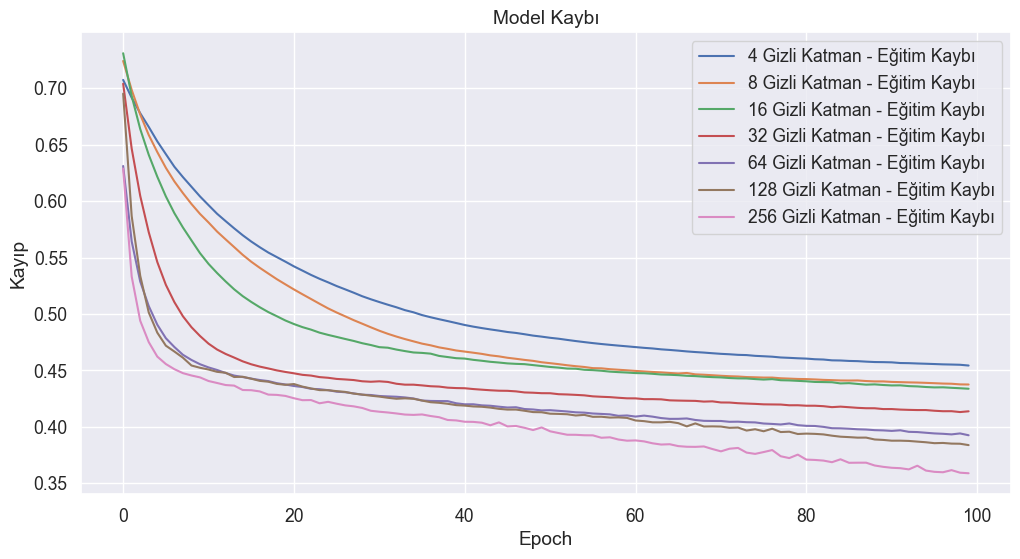

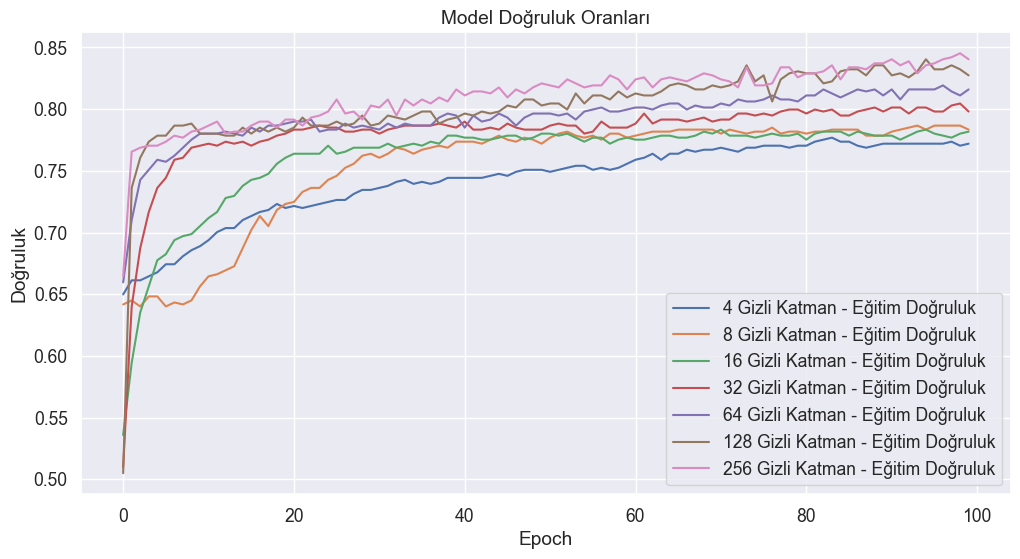

     Eğitim Doğruluk Oranı  Test Doğruluk Oranı
4                 0.771987             0.779221
8                 0.783388             0.811688
16                0.781759             0.805195
32                0.798046             0.798701
64                0.815961             0.798701
128               0.827362             0.818182
256               0.840391             0.792208


In [50]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = dataset.iloc[:,0:8].values
y = dataset.iloc[:, -1].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=12)


def train_and_evaluate_model(hidden_layer_size):
    model = Sequential()
    model.add(Dense(hidden_layer_size, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    hist = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=0)

    training_acc = hist.history['accuracy'][-1]
    testing_acc = hist.history['val_accuracy'][-1]
    
    return training_acc, testing_acc, hist.history

# Farklı katman boyutları için model eğitimi
hidden_layer_sizes = [4, 8, 16, 32, 64, 128, 256]
results = {}
histories = {}

for size in hidden_layer_sizes:
    training_acc, testing_acc, history = train_and_evaluate_model(size)
    results[size] = {'Eğitim Doğruluk Oranı': training_acc, 'Test Doğruluk Oranı': testing_acc}
    histories[size] = history

# Sonuçların DataFrame'e dönüştürülmesi
results_df = pd.DataFrame(results).T

# Sonuçların ve eğitim grafiklerinin çizdirilmesi
plt.figure(figsize=(12, 6))

# Kayıp grafikleri
for size, history in histories.items():
    plt.plot(history['loss'], label=f'{size} Gizli Katman - Eğitim Kaybı')

plt.title('Model Kaybı')
plt.ylabel('Kayıp')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Doğruluk grafikleri
plt.figure(figsize=(12, 6))

for size, history in histories.items():
    plt.plot(history['accuracy'], label=f'{size} Gizli Katman - Eğitim Doğruluk')

plt.title('Model Doğruluk Oranları')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Sonuçların yazdırılması
print(results_df)
